# Assignment - 7- A
## Neural Style Transfer

## Introduction

Style transfer consists in generating an image
with the same "content" as a base image, but with the
"style" of a different picture (typically artistic).
This is achieved through the optimization of a loss function
that has 3 components: "style loss", "content loss",
and "total variation loss":

- The total variation loss imposes local spatial continuity between
the pixels of the combination image, giving it visual coherence.
- The style loss is where the deep learning keeps in --that one is defined
using a deep convolutional neural network. Precisely, it consists in a sum of
L2 distances between the Gram matrices of the representations of
the base image and the style reference image, extracted from
different layers of a convnet (trained on ImageNet). The general idea
is to capture color/texture information at different spatial
scales (fairly large scales --defined by the depth of the layer considered).
- The content loss is a L2 distance between the features of the base
image (extracted from a deep layer) and the features of the combination image,
keeping the generated image close enough to the original one.

## Tasks

1. Import the content image and style image using below given code.
2. Perform standard preprocessing ( Convrting dtype of image, resize and adding batch dimension)
3. Write functions to calculate Style loss, content loss and total variation loss and gram matrix.
4. Import pretrained VGG/Resnet Model. We will be using this to extract embedding for content and style images. Set trainable to False.
5. Select layers for extracting content and style information. For VGG19, a typical combination is provided below. Feel free to experiment with different layers.
6. Perform model training with number of epochs set to higher number(Ex- 5000's). Use early stopping call back to monitor loss and stop if there is no improvement in performance. (Ex- When decrement is loss is less than 50 , then stop)
7. Print the final transformed image along side content and style image.
8. Now consider any other example set ( Your own set of content and style images ). Pass it through the network without training and print the resultant image.

Ref- https://arxiv.org/abs/1508.06576

## Note -

Change the runtime type to T4 GPU on your colab. Without GPU , the model takes much longer.

In [1]:
nightcanvas_image="https://cdn.britannica.com/78/43678-050-F4DC8D93/Starry-Night-canvas-Vincent-van-Gogh-New-1889.jpg"
dog_image= "https://kb.rspca.org.au/wp-content/uploads/2018/11/golder-retriever-puppy.jpeg"

In [2]:
from google.colab import files as FILE
import requests

img_data = requests.get(nightcanvas_image).content
with open('nightcanvas_image.jpg', 'wb') as handler:
    handler.write(img_data)

img_data = requests.get(dog_image).content
with open('dog.jpeg', 'wb') as handler:
    handler.write(img_data)

In [3]:
content_image_path = 'dog.jpeg'
style_image_path = 'nightcanvas_image.jpg'

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

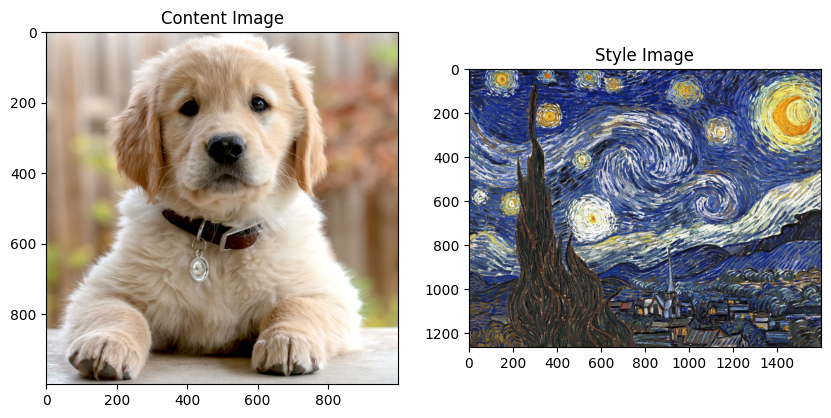

In [6]:
# Load the content and style images
content = plt.imread(content_image_path)
style = plt.imread(style_image_path)

# Display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 12))

# Content and style images side-by-side
ax1.imshow(content)
ax1.set_title('Content Image')
ax2.imshow(style)
ax2.set_title('Style Image')
plt.show()


In [ ]:
## Content and Style layers when you are trying Resnet
# Content layer
content_layers = ['conv1_conv']

# Style layer
style_layers = ['conv2_block1_2_bn',
                'conv3_block1_1_bn',
                'conv3_block2_1_bn',
                'conv4_block1_2_bn',
                'conv5_block1_2_bn']


## Content and Style layers when you are trying VGG19

style_layer = [
    "block1_conv1",
    "block2_conv1",
    "block3_conv1",
    "block4_conv1",
    "block5_conv1",
]
content_layer = "block5_conv2"

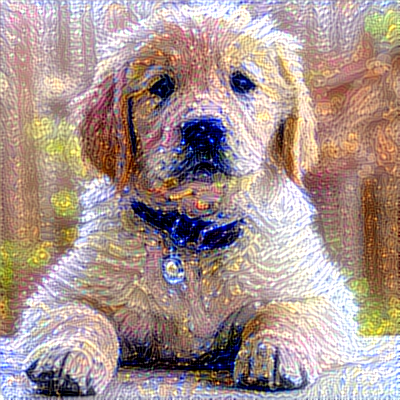